# Quantum Computing

## Qauntum Teleportation Protocol

Final statevector :
Statevector([0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
             0.        +0.00000000e+00j, 0.70710678+0.00000000e+00j,
             0.        +0.00000000e+00j, 0.        -0.00000000e+00j,
             0.        +0.00000000e+00j, 0.70710678-8.65956056e-17j],
            dims=(2, 2, 2))


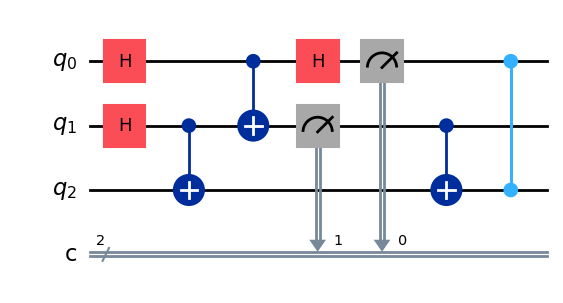

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit_aer import Aer

# Create a circuit with 3 qubits and 2 classical bits

qc = QuantumCircuit(3, 2)

# the unknown qubit |ψ>
# |ψ> = (|0> + |1>)/√2  = |+>
qc.h(0)

#  Shared entanglement
qc.h(1)
qc.cx(1, 2)

#  Bell measurement
qc.cx(0, 1)
qc.h(0)

# Measure
qc.measure([0, 1], [0, 1])

# apply correction depending on the results

qc.cx(1, 2) 
qc.cz(0, 2)  

# Run simulation
simulator = Aer.get_backend('statevector_simulator')
result = simulator.run(transpile(qc)).result()
statevector = result.get_statevector(qc)

print("Final statevector :")
print(statevector)

# Draw the circuit
qc.draw("mpl")